## EDA

In [1]:
# Import libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ritwi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load in dataset
file_path = r"C:\Users\ritwi\Downloads\AI Residency\Datasets\ACME-HappinessSurvey2020.csv"
df = pd.read_csv(file_path)
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [3]:
# Get the dimensions of the dataset
df.shape

(126, 7)

In [4]:
# Check data types and counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


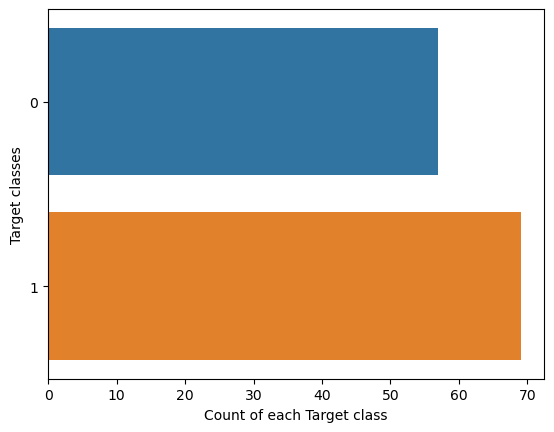

In [5]:
# Get a count of the target variable to see if the dataset is imbalanced
sns.countplot(y=df['Y'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

## Classes are mostly balanced, slightly skewed towards class 1 or the positive class, about 60 to 40 ratio

In [6]:
# Get a list of the summary statistics for the dataset
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# 

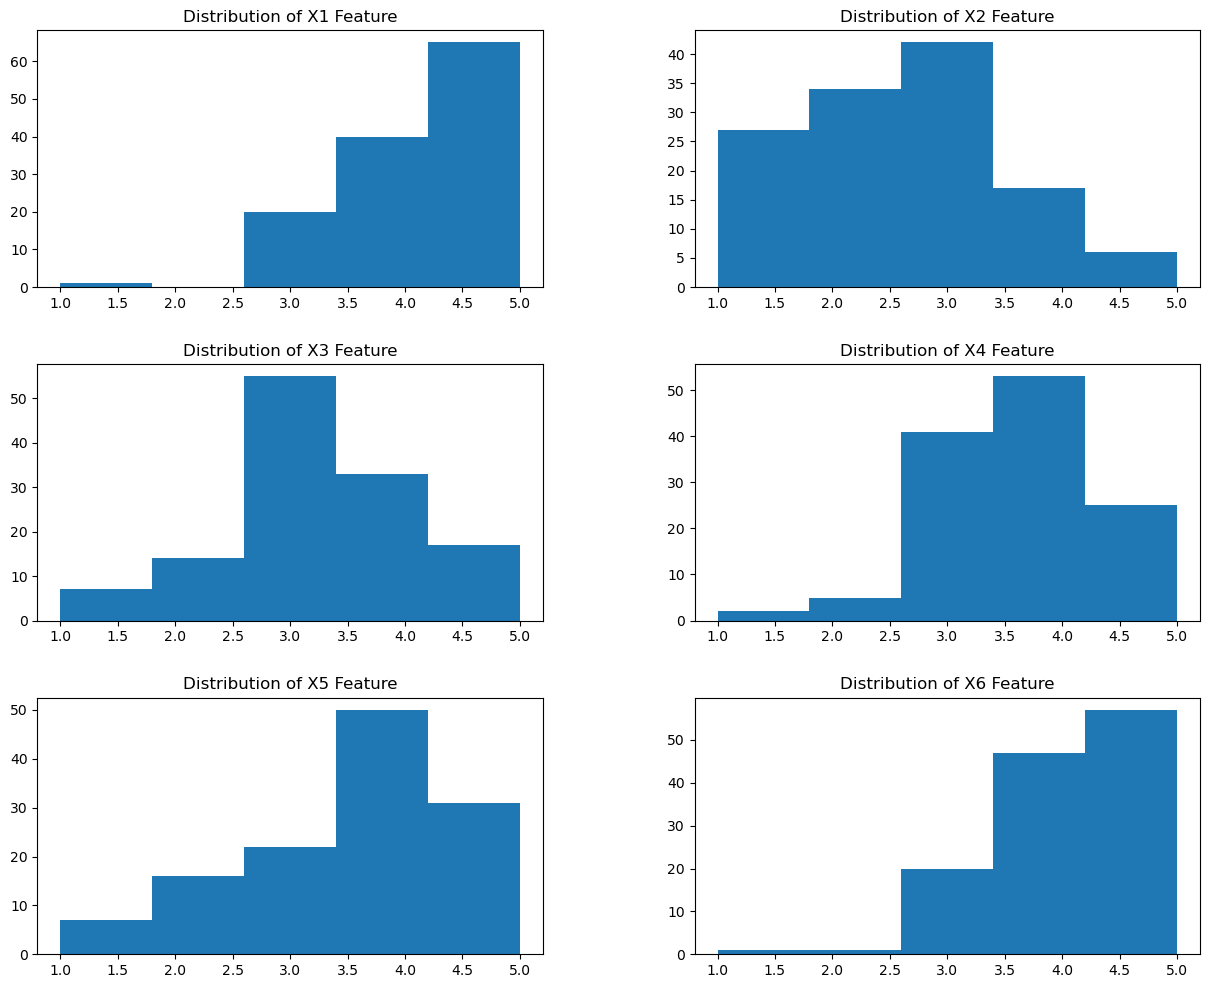

In [7]:
# Check the distribution of all the features
df.rename(columns={"X1": "Distribution of X1 Feature", "X2": "Distribution of X2 Feature",
                   "X3": "Distribution of X3 Feature", "X4": "Distribution of X4 Feature",
                   "X5": "Distribution of X5 Feature", "X6": "Distribution of X6 Feature"}).iloc[:, 1:].hist(figsize=(15,12),bins = 5, grid = False)
plt.show()

## X5 and X6 are skewed to the right so might be good predictors for the 1 class, X2 skewed more to the left to might be a good predictor for the 0 class

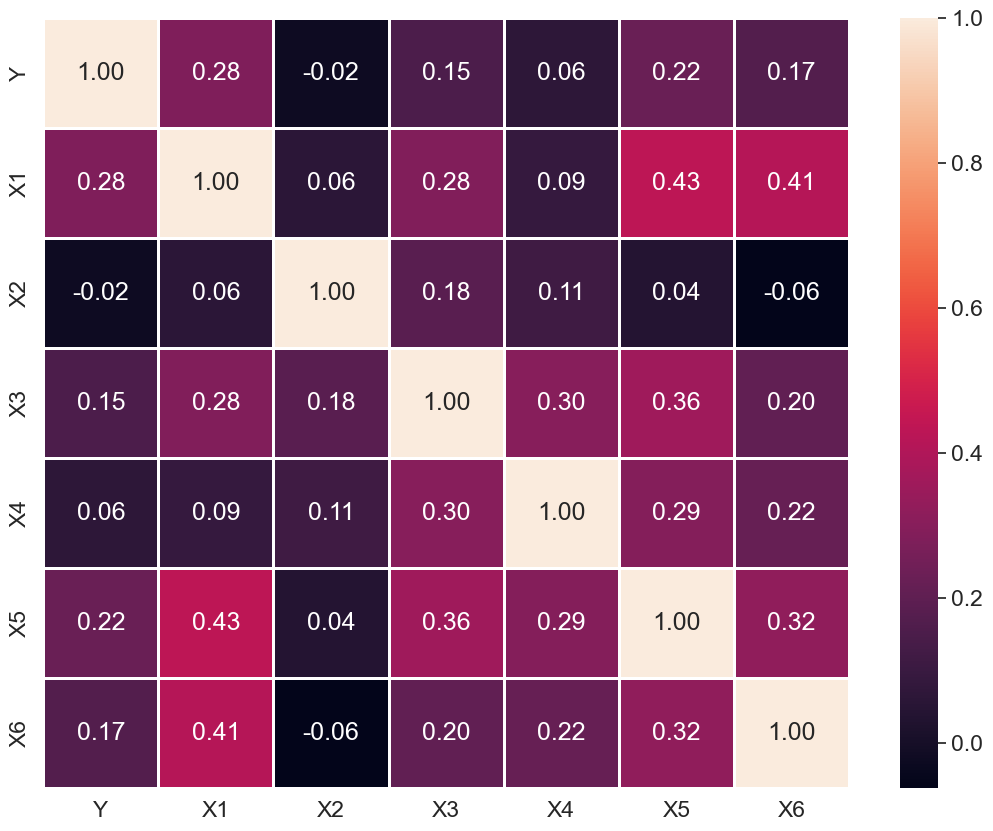

In [8]:
# Create a correlation matrix
fig = plt.figure(figsize=(13,10))

sns.set(style="dark",font_scale=1.5)

cmap = sns.color_palette('bright')

sns.heatmap(df.corr(), linewidth=2, annot = True, fmt= '.2f')
plt.show()

In [9]:
data1 = np.random.normal(0, 1, 100)
data1

array([ 0.21470474, -2.96320129, -1.0700703 ,  2.44601687, -0.56115042,
       -0.77864346, -0.10569001,  0.09406461,  0.8090439 , -1.15635669,
       -2.21395227,  0.64188507, -0.51704014,  0.8543246 , -0.87472856,
       -0.40005706, -1.92732885, -0.49676471, -0.3085714 , -2.25727603,
       -0.36624781, -0.17541622,  0.11250602,  0.75232305,  0.31807291,
       -0.31653568, -1.44466977, -1.34432119, -0.87462543,  0.18441275,
        1.2940098 ,  1.32963405, -0.12961556,  0.6877546 ,  0.88045508,
        0.36264928, -0.43150974,  0.29467683,  0.55903964, -0.10596273,
        0.35725799, -0.35989   ,  0.93207571,  0.67732063,  1.36341211,
       -0.16771595,  1.66992717, -0.4051523 , -0.34808977, -1.390381  ,
        0.52554912, -0.73603405,  0.47852764,  0.67339715,  0.31499023,
       -0.70376447,  0.50435681,  0.19960863, -0.63438277, -1.03201152,
       -0.9053405 ,  0.08975866,  0.21527995,  1.02017877,  0.07864217,
        0.27106006,  1.69349566,  0.33485743, -1.75391461,  0.28

## All correlations under 0.5 so no strong relationships between any of these variables

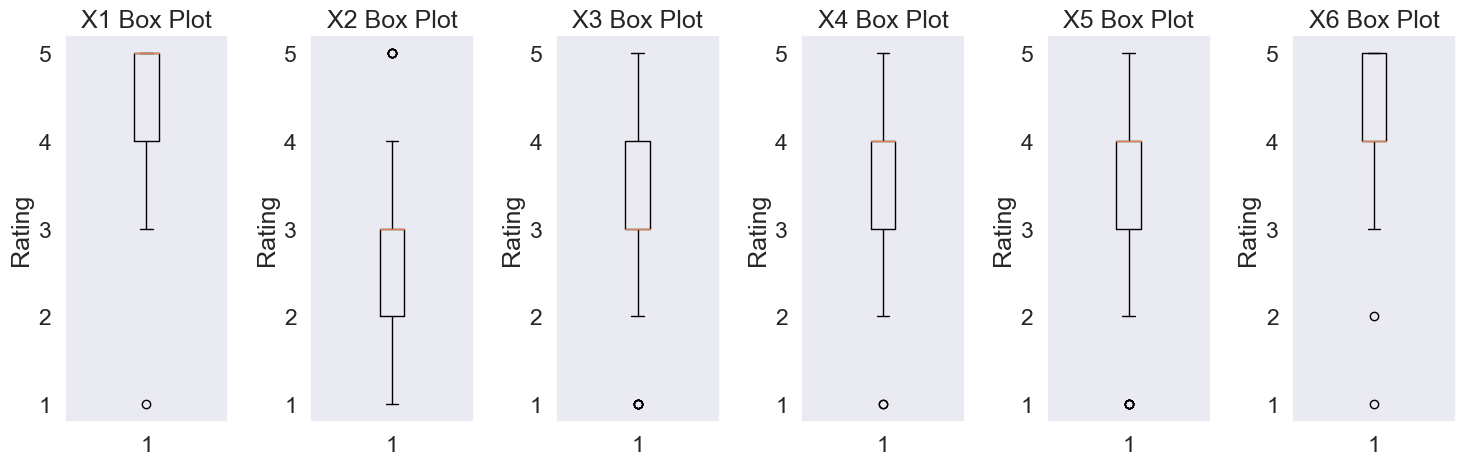

In [10]:
# Boxplot of all of the predictor variables
# Creates subplots
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
# Plots Boxplot for X1
axs[0].boxplot(df['X1'])
axs[0].set_title('X1 Box Plot')
axs[0].set_ylabel('Rating')
# Plots Boxplot for X2
axs[1].boxplot(df['X2'])
axs[1].set_title('X2 Box Plot')
axs[1].set_ylabel('Rating')
# Plots Boxplot for X3
axs[2].boxplot(df['X3'])
axs[2].set_title('X3 Box Plot')
axs[2].set_ylabel('Rating')
# Plots Boxplot for X4
axs[3].boxplot(df['X4'])
axs[3].set_title('X4 Box Plot')
axs[3].set_ylabel('Rating')
# Plots Boxplot for X5
axs[4].boxplot(df['X5'])
axs[4].set_title('X5 Box Plot')
axs[4].set_ylabel('Rating')
# Plots Boxplot for X6
axs[5].boxplot(df['X6'])
axs[5].set_title('X6 Box Plot')
axs[5].set_ylabel('Rating')
# Adjusts layout
plt.tight_layout()
plt.show()

## Typically middle part of the data is between 3 and 4, with X2 averaging lower as observed above